In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import os
import statsmodels.api as sm
import statsmodels.formula.api as smf


# Read and clear the data, transform into useful form

              year          mo      extent        area
count   458.000000  458.000000  456.000000  456.000000
mean   1997.414847    6.521834   11.750329    9.291009
std      11.029221    3.464191    3.173583    3.210826
min    1978.000000    1.000000    3.630000    2.370000
25%    1988.000000    4.000000    9.225000    6.310000
50%    1997.000000    7.000000   12.370000    9.890000
75%    2007.000000   10.000000   14.542500   12.275000
max    2016.000000   12.000000   16.520000   13.870000
   const  march  sept  year
0    1.0  16.52  7.22  1979
1    1.0  16.21  7.86  1980
2    1.0  15.70  7.25  1981


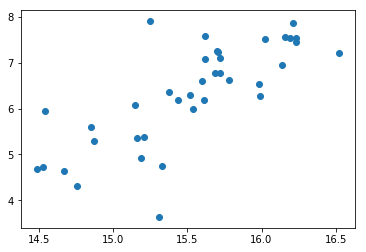

In [4]:
sie = pd.read_csv('N_extent_v2.1.csv')
sie = sie.rename(columns = lambda x: x.strip())
sie.set_value(sie["extent"] < 0, "extent", np.nan)
sie.set_value(sie["area"] < 0, "area", np.nan)
sie = sie[sie.year < 2017]
print(sie.describe())
data = pd.DataFrame(np.ones(sum(sie["mo"] == 3)), columns=["const"])
data = data.assign(march = sie["extent"][sie["mo"] == 3].values)
data = data.assign(sept = sie["extent"][sie["mo"] == 9].values)
data = data.assign(year = sie["year"][sie["mo"] == 3].values)
print(data.head(3))
plt.scatter(data["march"], data["sept"])


Compute Loss function

Loss = [[ 29.948236]]


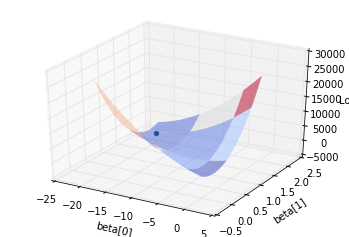

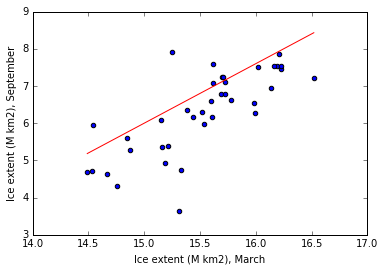

In [5]:
beta_trial = np.matrix([-18, 1.6]).T
## compute loss
y = np.matrix(data["sept"].values).T
X = data.as_matrix(["const", "march"])
l = (y - np.matmul(X, beta_trial))
Loss = np.matmul(l.T, l)
print "Loss =", Loss
## Make loss plot
fig = plt.figure()
ax = fig.gca(projection="3d")
plt.xlabel("beta[0]")
plt.ylabel("beta[1]")
ax.set_zlabel("Loss")
beta0r = np.linspace(-20, 0, 25)
beta1r = np.linspace(0.0, 2.0, 25)
beta0, beta1 = np.meshgrid(beta0r, beta1r)
L = []
for i in range(len(beta0.flatten())):
    b0 = beta0.flatten()[i]
    b1 = beta1.flatten()[i]
    beta = np.matrix([b0, b1]).T
    l = (y - np.matmul(X, beta))
    loss = np.asscalar(np.matmul(l.T, l))
#    L.append(np.log(loss))
    L.append(loss)
L = np.reshape(np.matrix(L), (len(beta1r), len(beta0r)))
surf = ax.plot_surface(beta0, beta1, L, cmap=cm.coolwarm, linewidth=0, alpha=0.5)
# ax.scatter(beta_trial[0], beta_trial[1], np.log(Loss), marker="o", color="green")
ax.scatter(beta_trial[0], beta_trial[1], Loss, marker="o", color="green")
## make regression plot
fig_line = plt.figure()
ax1 = fig_line.add_subplot(111)
ax1.scatter(data["march"], data["sept"])
plt.xlabel("Ice extent (M km2), March")
plt.ylabel("Ice extent (M km2), September")
x0 = min(data["march"])
y0 = beta_trial[0,0] + beta_trial[1,0]*x0
x1 = max(data["march"])
y1 = beta_trial[0,0] + beta_trial[1,0]*x1
ax1.plot([x0, x1], [y0, y1], color="red")